📁 Upload your 'nba_traditional_RS_2020_2025.csv' file


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025 (7).csv


/tmp/ipython-input-10-414487230.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=elite_players, x='Elite_Impact_Score', y='PLAYER', palette='viridis')


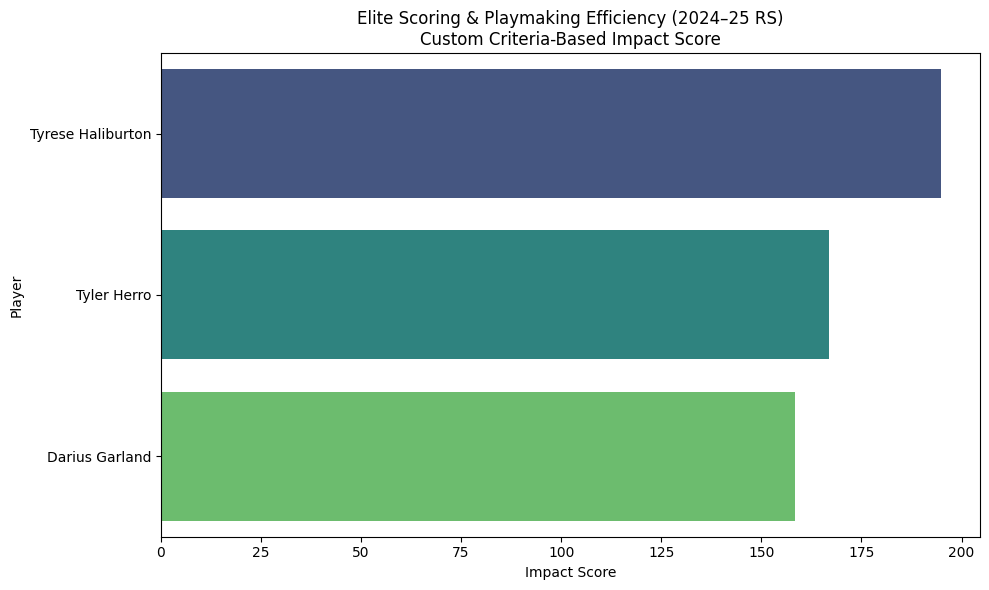

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📂 Step 2: Upload CSV
print("📁 Upload your 'nba_traditional_RS_2020_2025.csv' file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📥 Step 3: Load CSV
df = pd.read_csv(filename)

# 🔍 Step 4: Filter for 2024–25 Regular Season
df = df[(df['Year'] == '2024-25') & (df['Season_Type'] == 'Regular Season')].copy()

# 🔧 Step 5: Convert Needed Columns to Numeric
cols = [
    'FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT',
    'AST', 'TOV'
]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# 🧠 Step 6: Apply Elite Criteria
df = df[
    (df['FGA'] > 600) &
    (df['FG_PCT'] > 0.46) &
    (df['FG3A'] > 500) &
    (df['FG3_PCT'] > 0.37) &
    (df['FTA'] > 150) &
    (df['FT_PCT'] > 0.84) &
    (df['AST'] > 350) &
    (df['TOV'] < 230)
]

# 📊 Step 7: Create Custom "Elite Scoring & Playmaking Impact Score"
# Weighted components: Shooting efficiency, 3PT efficiency, FT efficiency, Assist-to-Turnover ratio, volume
df['Elite_Impact_Score'] = (
    (df['FG_PCT'] * 100) * 0.25 +      # FG% weight
    (df['FG3_PCT'] * 100) * 0.20 +     # 3PT% weight
    (df['FT_PCT'] * 100) * 0.15 +      # FT% weight
    ((df['AST'] / df['TOV']) * 15) +   # AST/TOV scaled
    ((df['FGA'] / 100) * 5) +          # Volume weight
    ((df['FG3A'] / 100) * 5)           # 3PT Volume weight
)

# 🥇 Step 8: Sort by Impact Score
elite_players = df.sort_values(by='Elite_Impact_Score', ascending=False)[
    ['PLAYER', 'Elite_Impact_Score', 'FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'AST', 'TOV']
]

# 📊 Step 9: Plot Impact Score instead of Points
plt.figure(figsize=(10, 6))
sns.barplot(data=elite_players, x='Elite_Impact_Score', y='PLAYER', palette='viridis')
plt.title('Elite Scoring & Playmaking Efficiency (2024–25 RS)\nCustom Criteria-Based Impact Score')
plt.xlabel('Impact Score')
plt.ylabel('Player')
plt.tight_layout()

# 💾 Step 10: Save Outputs
img_path = 'elite_scoring_playmaking_impact_score_2024_25.jpg'
csv_path = 'elite_scoring_playmaking_impact_score_2024_25.csv'

plt.savefig(img_path, dpi=300)
elite_players.to_csv(csv_path, index=False)
plt.show()

# 📥 Step 11: Auto-Download
files.download(img_path)
files.download(csv_path)